In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from scipy import sparse, integrate


In [11]:
# Set x range
dx: float   = 0.02
x: np.array = np.arange(0, 10, dx)

# Wave properties
k_x: float  = 0.1                   # Wave number
m: float    = 1.0                   # Mass of wave

# Wave packet initialization
wave_w: float    = 0.1               # Width of initial gaussian wave packet
wave_x: float   = 3.0               # Center of initial gaussian wave packet

A: float        = 1.0 / (wave_w * np.sqrt(np.pi))    # Normalization constant

In [12]:
V_height = 50
V = np.zeros(x.shape)
for i, _x in enumerate(x):
    if _x >= 4.5 and _x <= 5.5:
        V[i] = V_height

In [13]:
# Laplace Operator
D2: sparse.dia_matrix = sparse.diags([1,-2,1], [-1,0,1], shape=(x.size, x.size)) / dx**2
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [14]:
psi_0: np.array    = np.exp(-(x-wave_x)**2 / (2.0 * wave_w**2)) * np.exp(1j * k_x * x) * np.sqrt(A)

In [15]:
# Defining the Schrodinger wave function

hbar: float = 1.0

def psi_t(t: np.array, psi: np.array) -> np.array:
    return - 1j * ((-0.5 * hbar / m) * D2.dot(psi) + (V/hbar)*psi)

In [16]:
# We will use scipy to solve the equations

dt: float           = 0.005  # time interval for snapshots
t0: float           = 0.0    # initial time
tf: float           = 1.0    # final time
t_eval: np.array    = np.arange(t0, tf, dt)  # recorded time shots

# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi_0, t_eval = t_eval, method="RK23")

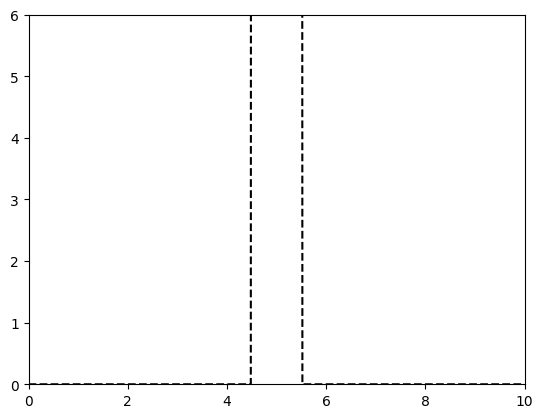

In [17]:
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])
def init():
    line1.set_data(x, V)
    return line1,
def animate(i):
    line2.set_data(x, np.abs(sol.y[:,i])**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)

In [18]:
anim.save(f'sho_v{V_height}.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=300)